In [4]:
import numpy as np
import math
from scipy.misc import imresize 

def feature_pca(X, energy_percent):
    Z_mean = np.mean(X, axis = 1)
    Z = np.zeros((6300,80))
    for i in range(6300):
        for j in range(80):
            Z[i][j] = X[i][j] - Z_mean[i]
            
    S1 = (1 / (80 - 1)) * (np.matmul(Z, np.transpose(Z)))
    S2 = (1 / (80 - 1)) * (np.matmul(np.transpose(Z), Z))
    
    v1, d1 = np.linalg.eig(S1)
    v2, d2 = np.linalg.eig(S2)
    v3 = (1 / math.sqrt(79)) * np.matmul(Z, v2)
    
    eigvals1 = np.diag(d1)
    eigvals2 = np.diag(d2)
    
    sorted_index1 = [i[0] for i in sorted(enumerate(eigvals1), reverse = True, key=lambda x:x[1])]
    sorted_index2 = [i[0] for i in sorted(enumerate(eigvals2), reverse = True, key=lambda x:x[1])]
    
    energy = 0
    i = 1
    while energy < np.sum(eigvals1) * energy_percent:
        energy = energy + eigvals1[sorted_index1[i]]
        i += 1
    
    N = i - 1
    topV1 = np.zeros((6300, N))
    for i in range(0, N):
        topV1[:,i] = v1[:,sorted_index1[i]]
        
        
    energy = 0
    i = 1
    while energy < np.sum(eigvals2) * energy_percent:
        energy = energy + eigvals2[sorted_index2[i]]
        i += 1
    
    N = i - 1
    topV2 = np.zeros((6300, N))
    for i in range(0, N):
        topV2[:,i] = v3[:,sorted_index2[i]]
        
    pca = np.matmul(np.transpose(topV1), Z)
    
    return pca, N


def rand_feature(raw_pixels, size):
    projection = np.random.randn(6300,size)
    ret = np.transpose(projection) * raw_pixels;
    
    return ret

def feature_raw_pixel(all_image, size_h, size_w):
    new_size = size_h * size_w
    ret = np.zeros(new_size,80)
    for i in range(0, 80):
        ret[:, i] = np.reshape(imresize(all_image[:,:,i], [size_h, size_w]), (new_size, 1))
        
    return ret

def knn(input_idx, features, dim):
    dist = np.zeros(1,80)
    for i in range(0,80):
        dist[1:i] = np.sum((features[:, input_idx] - features[:,i]) ** 2)
        
    sorted_index = [i[0] for i in sorted(enumerate(dist), key=lambda x:x[1])]
    
    result_idx = sorted_idx[1, 2:dim+1]
    
    top_n = np.fix((result_idx - 1) / 20);
    ret_class = np.argmax(np.bincount(top_n))
    
    return result_idx, ret_class


def knn_10(input_idx, features):
    min_dist = np.inf
    result_idx = 0
    for i in range(0, 80):
        if i != input_idx:
            dist = np.sum((features[:, input_idx] - features[:,i]) ** 2)
            if dist < min_dist:
                min_dist = dist;
                result_idx = i;
    
    return result_idx

def rgb2gray(rgb):
     
    red, green, blue = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * red + 0.5870 * green + 0.1140 * blue

    return gray



    
        
    

In [ ]:
from PIL import Image
import matplotlib.image as mpimg

imglist = np.zeros((90,70 ,3 ,80))
grayimglist = np.zeros((90,70,80))

name1 = list("test/A1.jpg")
name2 = list("test/A10.jpg")
name3 = list("test/A20.jpg")

count = 0
for i in range(4):
    for j in range(9):
        imglist[:,:,:,count] = mpimg.imread("".join(name1))
        name1[6] = chr(ord(name1[6]) + 1 )
        count = count + 1
    for j in range(10):
        imglist[:,:,:,count] = mpimg.imread("".join(name2))
        name2[7] = chr(ord(name2[7]) + 1 )
        count = count + 1
    imglist[:,:,:,count] = mpimg.imread("".join(name3))
    count = count + 1
    name1[5] = chr(ord(name1[5]) + 1)
    name1[6] = chr(ord("1"))
    name2[5] = chr(ord(name2[5]) + 1)
    name2[7] = chr(ord("0"))
    name3[5] = chr(ord(name3[5]) + 1)

    
for i in range(80):
    grayimglist[:,:,i] = rgb2gray(imglist[:,:,:,i])
    
all_image = np.reshape(grayimglist, (6300, 80))

pca, N = feature_pca(all_image, 0.98)
print(pca)
#image   Image.open('test/A1.jpg')



print (np.shape(imglist))

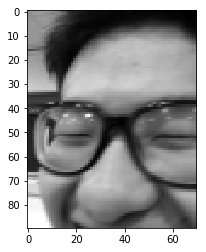

(90, 70)


In [73]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img_ben = mpimg.imread('ben/IMG_3188.JPG')
outname = "ben_out/ben_out_40.jpg"

# gray_ben = np.zeros((960,960))


gray_ben = rgb2gray(img_ben)

reshape_ben = gray_ben[130:830, 30:930]

final_ben = np.zeros((90,70))

for i in range(70):
    for j in range(90):
        temp = 0
        for k in range(10):
            for m in range(10):
                temp = temp + reshape_ben[i*10 + k][j*10 + m]
        temp = temp / 100
        final_ben[j][i] = temp

        
plt.imshow(final_ben, cmap='gray')
plt.imsave(outname, final_ben, cmap='gray')
plt.show()
        
        
print(np.shape(final_ben))